## Multi Schema matching
Si tratta di matchare più di due schemi diversi sugli attributi, utilizzando Spacy e vedendo le colonne come frasi/testi

In [15]:
import Utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns; sns.set_theme()
import pandasql as psql
pysqldf = lambda q: psql.sqldf(q, globals())

In [2]:
SOURCES={}
i=0
DF=pd.read_csv('movies/0imdb.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/1roger_ebert.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/2rotten_tomatoes.csv').astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/3rotten_tomatoes.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/4amazon.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/5imdb.csv',index_col=0).astype(str)
SOURCES[str(i)] = DF
i=i+1
DF=pd.read_csv('movies/6imdb.csv').astype(str)
SOURCES[str(i)] = DF


In [16]:
GS = pd.read_csv('movies/Movie_MTGS.csv').astype(str)
GS

,GAT,SOURCE,LAT,SLAT
0,Filming_Locations,2,Filming Locations,2_Filming Locations
1,RatingCount,2,RatingCount,2_RatingCount
2,ReviewCount,2,ReviewCount,2_ReviewCount
3,movie_country,2,Country,2_Country
4,movie_genre,0,genre,0_genre
...,...,...,...,...
66,movie_cost,4,cost,4_cost
67,movie_summary,2,Description,2_Description
68,movie_summary,3,Summary,3_Summary
69,movie_summary,5,Summary,5_Summary


In [3]:
#Campionamento degli attributi


In [4]:
#Trasformo il dizionario di DataFrame in un dizionario di SchemaDoc
SOURCES_sd = {}
nlp=spacy.load('en_vectors_web_lg')
for k,v in SOURCES.items():
    df = Utilities.sampleDF_clean(v, 400)

    SOURCES_sd[k] = Utilities.SchemaDoc(df, sep='. ', nlp=nlp, pre=False, verbose=True)
#Ottengo la SimilarityTable di ogni coppia e le appendo tutte insieme


Creation doc movie_name
Creation doc year
Creation doc directors
Creation doc actors
Creation doc movie_rating
Creation doc genre
Creation doc duration
Fine SchemaDoc
Creation doc movie_name
Creation doc year
Creation doc directors
Creation doc actors
Creation doc critic_rating
Creation doc genre
Creation doc pg_rating
Creation doc duration
Fine SchemaDoc
Creation doc Id
Creation doc Name
Creation doc Year
Creation doc Release Date
Creation doc Director
Creation doc Creator
Creation doc Actors
Creation doc Cast
Creation doc Language
Creation doc Country
Creation doc Duration
Creation doc RatingValue
Creation doc RatingCount
Creation doc ReviewCount
Creation doc Genre
Creation doc Filming Locations
Creation doc Description
Fine SchemaDoc
Creation doc Title
Creation doc Year
Creation doc Rating
Creation doc Director
Creation doc Creators
Creation doc Cast
Creation doc Genre
Creation doc Duration
Creation doc ContentRating
Creation doc Summary
Fine SchemaDoc
Creation doc title
Creation do

In [5]:
SOURCES_sd

{'0': ['movie_name', 'year', 'directors', 'actors', 'movie_rating', 'genre', 'duration'],
 '1': ['movie_name', 'year', 'directors', 'actors', 'critic_rating', 'genre', 'pg_rating', 'duration'],
 '2': ['Id', 'Name', 'Year', 'Release Date', 'Director', 'Creator', 'Actors', 'Cast', 'Language', 'Country', 'Duration', 'RatingValue', 'RatingCount', 'ReviewCount', 'Genre', 'Filming Locations', 'Description'],
 '3': ['Title', 'Year', 'Rating', 'Director', 'Creators', 'Cast', 'Genre', 'Duration', 'ContentRating', 'Summary'],
 '4': ['title', 'time', 'director', 'year', 'star', 'cost'],
 '5': ['Title', 'Year', 'Rating', 'Director', 'Creators', 'Cast', 'Genre', 'Duration', 'ContentRating', 'Summary'],
 '6': ['Id', 'Name', 'YearRange', 'ReleaseDate', 'Director', 'Creator', 'Cast', 'Duration', 'RatingValue', 'ContentRating', 'Genre', 'Url', 'Description']}

In [6]:
#crea la tabella dei match su tutti gli schemi, dove in seguito si applica la chiusura transitiva
MATCHES=pd.DataFrame(columns=['SOURCE_A', 'LAT_A', 'SOURCE_B', 'LAT_B', 'SLAT_A', 'SLAT_B','sim'])

for x in SOURCES_sd.keys():
    for y in SOURCES_sd.keys():
        if (x<y):
            #  print(x,y)
            MT= Utilities.similaritySchemadocs(SOURCES_sd[x], SOURCES_sd[y])
            MT.columns=['LAT_A','LAT_B','sim']
            MT['SOURCE_A']=x
            MT['SOURCE_B']=y
            MT['SLAT_A']=MT['SOURCE_A'] + '_' + MT['LAT_A']
            MT['SLAT_B']=MT['SOURCE_B'] + '_' + MT['LAT_B']
            MATCHES=MATCHES.append(MT, sort=True)
    
MATCHES=MATCHES[['SLAT_A','SLAT_B','sim']]

MATCHES

,SLAT_A,SLAT_B,sim
0,0_movie_name,1_movie_name,0.984347
1,0_movie_name,1_year,0.796936
2,0_movie_name,1_directors,0.617974
3,0_movie_name,1_actors,0.475009
4,0_movie_name,1_critic_rating,0.544295
...,...,...,...
125,5_Summary,6_RatingValue,0.528685
126,5_Summary,6_ContentRating,0.742026
127,5_Summary,6_Genre,0.714040
128,5_Summary,6_Url,0.000000


In [ ]:
#crea una match table identica, ma utilizzando lo stable marriage nei confronti tra SchemaDoc

In [8]:
Utilities.toSimMatrix(MATCHES)

A,0_movie_name,0_year,0_directors,0_actors,0_movie_rating,0_genre,0_duration,1_movie_name,1_year,1_directors,...,5_Title,5_Year,5_Rating,5_Director,5_Creators,5_Cast,5_Genre,5_Duration,5_ContentRating,5_Summary
B,,,,,,,,,,,,,,,,,,,,,
1_movie_name,0.984347,0.661074,0.657457,0.563688,0.521410,0.761771,0.557608,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_year,0.796936,0.812728,0.637361,0.439271,0.702274,0.637496,0.642983,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_directors,0.617974,0.453111,0.965727,0.904042,0.345986,0.468243,0.369267,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_actors,0.475009,0.279837,0.801221,0.966579,0.164067,0.519491,0.207816,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_critic_rating,0.544295,0.631920,0.361720,0.234894,0.873913,0.433509,0.608975,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6_RatingValue,0.792728,0.813453,0.637425,0.438324,0.709193,0.635659,0.648779,0.785067,0.998755,0.597325,...,0.769795,0.504995,0.704594,0.631991,0.606873,0.585494,0.975804,0.646906,0.653698,0.528685
6_ContentRating,0.825490,0.652241,0.502671,0.456795,0.548977,0.785680,0.584376,0.824941,0.724760,0.484028,...,0.819413,0.474454,0.543512,0.516651,0.503763,0.490654,0.773575,0.581827,0.596671,0.742026
6_Genre,0.742744,0.559703,0.431795,0.497359,0.355630,0.915649,0.394904,0.760301,0.590381,0.451395,...,0.748933,0.386095,0.348004,0.469203,0.451581,0.447532,0.680552,0.392302,0.398745,0.714040


In [13]:
Utilities.toSimMatrix(MATCHES.query('sim > 0.6'))

A,0_movie_name,0_year,0_directors,0_actors,0_movie_rating,0_genre,0_duration,1_movie_name,1_year,1_directors,...,5_Title,5_Year,5_Rating,5_Director,5_Creators,5_Cast,5_Genre,5_Duration,5_ContentRating,5_Summary
B,,,,,,,,,,,,,,,,,,,,,
1_movie_name,0.984347,0.661074,0.657457,NaN,NaN,0.761771,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_year,0.796936,0.812728,0.637361,NaN,0.702274,0.637496,0.642983,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_directors,0.617974,NaN,0.965727,0.904042,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_genre,0.748311,NaN,NaN,NaN,NaN,0.967103,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_duration,0.627738,0.605069,NaN,NaN,NaN,NaN,0.896585,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6_Description,0.906912,NaN,NaN,NaN,NaN,0.767214,NaN,0.922826,NaN,NaN,...,0.928268,NaN,NaN,NaN,NaN,NaN,0.616577,NaN,NaN,0.988831
6_YearRange,NaN,0.882080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6_Creator,NaN,NaN,0.875508,0.960021,NaN,NaN,NaN,NaN,NaN,0.932293,...,NaN,NaN,NaN,0.915583,0.920723,0.913484,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='A', ylabel='B'>

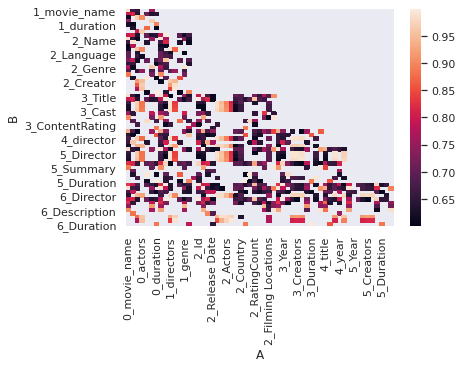

In [14]:
sns.heatmap(Utilities.toSimMatrix(MATCHES.query('sim > 0.6')))

In [18]:
#insieme di tutti i nodi collegati direttamente o indirettamente nel grafo
def ChiusuraRiflessivaTransitiva(MatchTable):
  def transitive_closure(a):
    closure = set(a)
    while True:
        new_relations = set((x,w) for x,y in closure for q,w in closure if q == y)
        closure_until_now = closure | new_relations
        if closure_until_now == closure:
            break
        closure = closure_until_now
    return closure

  SYMMETRIC=MatchTable[['B','A']]
  SYMMETRIC.rename(columns={'B':'A','A':'B'}, inplace=True)
  SYMMETRICMatchTable=MatchTable.append(SYMMETRIC)
  
  #SYMMETRIC_TRANSITIVE_CLOSURE=transitive_closure([(str(x[1]),str(x[0])) for x in SYMMETRICMatchTable.values.tolist()])
  SYMMETRIC_TRANSITIVE_CLOSURE=transitive_closure([(x[1],x[0]) for x in SYMMETRICMatchTable.values.tolist()])
  SYMMETRIC_TRANSITIVE_CLOSURE = pd.DataFrame(data=list(SYMMETRIC_TRANSITIVE_CLOSURE), 
                        columns=['A','B'])

  return SYMMETRIC_TRANSITIVE_CLOSURE

In [21]:
MATCHES

,SLAT_A,SLAT_B,sim
0,0_movie_name,1_movie_name,0.984347
1,0_movie_name,1_year,0.796936
2,0_movie_name,1_directors,0.617974
3,0_movie_name,1_actors,0.475009
4,0_movie_name,1_critic_rating,0.544295
...,...,...,...
125,5_Summary,6_RatingValue,0.528685
126,5_Summary,6_ContentRating,0.742026
127,5_Summary,6_Genre,0.714040
128,5_Summary,6_Url,0.000000


In [36]:
X=MATCHES.query('sim > 0.75')[['SLAT_A','SLAT_B']]
X.columns=['A','B']
ChiusuraRiflessivaTransitiva(X)

,A,B
0,6_Id,1_genre
1,2_Name,6_Id
2,6_RatingValue,6_RatingValue
3,2_Release Date,0_year
4,6_YearRange,2_Release Date
...,...,...
1749,6_YearRange,3_Year
1750,6_ReleaseDate,2_Description
1751,1_year,6_ReleaseDate
1752,2_RatingCount,2_RatingValue


In [37]:
def CalcoloDeiCluster(MT):
    Self=pd.merge(MT,MT, on=['A'])
    Group = MT.groupby('A', as_index=False)
    CLUSTERS=Group.agg({'B': np.max})
    CLUSTERS.columns=['ClusterElement','ClusterKey']
    CLUSTERS=CLUSTERS[['ClusterKey','ClusterElement']]

    return CLUSTERS

In [38]:
ClusterOttenuti= CalcoloDeiCluster(ChiusuraRiflessivaTransitiva(X))

# per concatenare mi servono delle stringhe, quindi

ClusterOttenuti = ClusterOttenuti.applymap(str)

def Aggregazione(x):    
      Campi = {
          'ClusterElement' :     x['ClusterElement'].str.cat(sep=', ')
          }
      return pd.Series(Campi)
    
  
ClusterOttenuti.groupby('ClusterKey').apply(Aggregazione)

,ClusterElement
ClusterKey,
5_ContentRating,"1_pg_rating, 3_ContentRating, 5_ContentRating"
6_Director,"0_actors, 0_directors, 1_actors, 1_directors, ..."
6_Duration,"0_duration, 1_duration, 2_Duration, 3_Duration..."
6_YearRange,"0_genre, 0_movie_name, 0_movie_rating, 0_year,..."


In [39]:
ClusterOttenuti

,ClusterKey,ClusterElement
0,6_Director,0_actors
1,6_Director,0_directors
2,6_Duration,0_duration
3,6_YearRange,0_genre
4,6_YearRange,0_movie_name
...,...,...
61,6_YearRange,6_Id
62,6_YearRange,6_Name
63,6_YearRange,6_RatingValue
64,6_YearRange,6_ReleaseDate


In [40]:
ClusterOttenuti.groupby('ClusterKey').apply(Aggregazione)


,ClusterElement
ClusterKey,
5_ContentRating,"1_pg_rating, 3_ContentRating, 5_ContentRating"
6_Director,"0_actors, 0_directors, 1_actors, 1_directors, ..."
6_Duration,"0_duration, 1_duration, 2_Duration, 3_Duration..."
6_YearRange,"0_genre, 0_movie_name, 0_movie_rating, 0_year,..."
